In [1]:
import json

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from shapely.geometry import asShape, JOIN_STYLE
from shapely.ops import cascaded_union
from shapely.geometry.geo import mapping
from descartes import PolygonPatch

In [4]:
#Not San Andres y Providencia
data = json.load(open('./geojsons/colombia/colombia.geojson'))
new_features = []
for f in data['features']:
    if f['properties']['DPTO'] != '88':
        new_features.append(f)
data['features'] = new_features
with open('./geojsons/colombia/colombia_not_s_y_p.geojson', 'w') as fp:
    json.dump(data, fp)

In [5]:
standard_dict = {    
    "ANTIOQUIA":"ANTIOQUIA",
    "ATLANTICO":"ATLANTICO",
    "SANTAFE DE BOGOTA D.C":"BOGOTA",
    "BOLIVAR":"BOLIVAR",
    "BOYACA":"BOYACA",
    "CALDAS":"CALDAS",
    "CAQUETA":"CAQUETA",
    "CAUCA":"CAUCA",
    "CESAR":"CESAR",
    "CORDOBA":"CORDOBA",
    "CUNDINAMARCA":"CUNDINAMARCA",
    "CHOCO":"CHOCO",
    "HUILA":"HUILA",
    "LA GUAJIRA":"GUAJIRA",
    "MAGDALENA":"MAGDALENA",
    "META":"META",
    "NARIÑO":"NARINO",
    "NORTE DE SANTANDER":"NORTEDESANTANDER",
    "QUINDIO":"QUINDIO",
    "RISARALDA":"RISARALDA",
    "SANTANDER":"SANTANDER",
    "SUCRE":"SUCRE",
    "TOLIMA":"TOLIMA",
    "VALLE DEL CAUCA":"VALLEDELCAUCA",
    "ARAUCA":"ARAUCA",
    "CASANARE":"CASANARE",
    "PUTUMAYO":"PUTUMAYO",
    "AMAZONAS":"AMAZONAS",
    "GUAINIA":"GUAINIA",
    "GUAVIARE":"GUAVIARE",
    "VAUPES":"VAUPES",
    "VICHADA":"VICHADA",
    "ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA":"SANANDRES"
}

In [36]:
#Standard names
data = json.load(open('./geojsons/colombia/colombia.geojson'))
new_features = []
for f in data['features']:
    f['properties']['STD_ID'] = standard_dict[f['properties']['NOMBRE_DPT']]
    new_features.append(f)
data['features'] = new_features
with open('./geojsons/colombia/colombia_std_names.geojson', 'w') as fp:
    json.dump(data, fp)

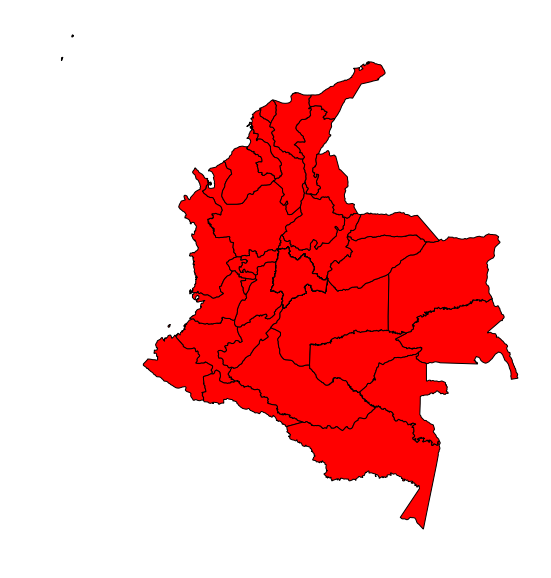

In [4]:
#Fused Cundinamarca and Bogota
data = json.load(open('./geojsons/colombia/colombia_std_names.geojson'))

new_data = {}
new_data['type'] = data['type']
new_data['crs'] = data['crs']
new_data_features = []

fig = plt.figure(figsize=(9, 10))
plt.axis('off')
ax = fig.gca() 

join_pols = {'CUNDINAMARCA': ['CUNDINAMARCA', 'BOGOTA']}
temp_pols_dict = {}

for i in join_pols:
    temp_pols_dict[i] = []

for feat in data["features"]:
    geom = asShape(feat["geometry"])
    for j in join_pols:
        if feat['properties']['STD_ID'] in set(join_pols[j]):
            temp_pols_dict[j].append(geom)
        else:
            new_data_features.append(feat)
            x, y = geom.centroid.x, geom.centroid.y
            ax.plot(x, y, '-')
            ax.add_patch(PolygonPatch(feat["geometry"], fc='red', ec='black',
                        alpha=1, lw=1, ls='-', zorder=2))
    for j in temp_pols_dict:
        if len(temp_pols_dict[j]) > 0:
            eps = 0.001
            shape = cascaded_union(temp_pols_dict[j])
            shape = shape.buffer(eps, 1, join_style=JOIN_STYLE.mitre).buffer(-eps, 1, join_style=JOIN_STYLE.mitre)
            #shape = temp_pols_dict[j][0]
            #for i in range(len(temp_pols_dict[j]) - 1):
            #    shape = shape.union(temp_pols_dict[j][i+1])
            new_feature = {
                            'type': 'Feature',
                            'properties': {
                                            'NOMBRE_DPT': j,
                                            'STD_ID': j
                          }}
            new_geometry = mapping(shape)
            new_geometry['type'] = 'MultiPolygon'
            new_geometry['coordinates'] = [new_geometry['coordinates']]
            new_feature['geometry'] = new_geometry
            new_data_features.append(new_feature)
            geom = asShape(new_feature["geometry"])
            x, y = geom.centroid.x, geom.centroid.y
            ax.plot(x, y, '-')
            ax.add_patch(PolygonPatch(new_feature["geometry"], fc='red', ec='black',
                        alpha=1, lw=1, ls='-', zorder=2))
ax.clear

new_data['features'] = new_data_features
with open('./geojsons/colombia/colombia_uni_cmarca.geojson', 'w') as fp:
    json.dump(new_data, fp)